In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
def k_fold_cross_validation(model, X, y, k=5, random_state=15):
    """
    Perform k-fold cross-validation for a given model.
    
    Args:
        model: The machine learning model to evaluate.
        X: Feature matrix (numpy array).
        y: Target vector (numpy array).
        k: Number of folds (default is 5).
        random_state: Random seed for reproducibility (default is None).

    Returns:
        - mean_val_error: The average validation error across k folds.
        - fold_errors: List of validation errors for each fold.
    """
    n_samples = len(X)
    indices = np.arange(n_samples)

    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    fold_errors = []

    for i in range(k):
        val_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, val_indices)

        X_train_fold, X_val_fold = X[train_indices], X[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        val_accuracy = accuracy_score(y_val_fold, y_val_pred)
        val_error = 1 - val_accuracy
        fold_errors.append(val_error)

    mean_val_error = np.mean(fold_errors)
    return mean_val_error, fold_errors

In [13]:
# Load preprocessed data
train_images = np.load('train_images_flat.npy')
train_labels = np.load('train_labels_noisy.npy')
train_images_subset = np.load('train_images_flat_subset.npy')
train_labels_subset = np.load('train_labels_noisy_subset.npy')
test_images = np.load('test_images_flat.npy')
test_labels = np.load('test_labels_binary.npy')

# Define hyperparameter search space
C_values = np.logspace(-3, 3, 10)
k = 5
optimal_C = None
lowest_error = float('inf')
errors = []

In [14]:
# Initialize variables to track the best configuration and errors
optimal_C = None
lowest_error = np.inf
best_training_error = np.inf  # Track the best training error

# Perform k-fold cross-validation for each C value
for C in C_values:
    model = SVC(kernel='linear', C=C)
    mean_val_error, fold_errors = k_fold_cross_validation(model, train_images_subset, train_labels_subset, k)
    
    # Track the best validation error and corresponding C
    if mean_val_error < lowest_error:
        lowest_error = mean_val_error
        optimal_C = C
    
    # Calculate the training error for this C value
    model.fit(train_images_subset, train_labels_subset)  # Train on the full subset
    train_predictions = model.predict(train_images_subset)
    train_error = 1 - accuracy_score(train_labels_subset, train_predictions)
    
    # Track the best training error
    if train_error < best_training_error:
        best_training_error = train_error

# Output the results
print("Optimal C:", optimal_C)
print("Best validation error:", lowest_error)
print("Best training error:", best_training_error)

Optimal C: 0.46415888336127775
Best validation error: 0.4765
Best training error: 0.0


In [15]:
# Train final model with optimal C
final_model = SVC(kernel='linear', C=optimal_C)
final_model.fit(train_images, train_labels) 

# Evaluate the model on the test set
test_predictions = final_model.predict(test_images)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_error = 1 - test_accuracy

# Output the test error
print("Test error with optimal C:", test_error)

Test error with optimal C: 0.03849999999999998


C: 0.0001, Training Error: 0.1134, Test Error: 0.1000
C: 0.0003, Training Error: 0.0899, Test Error: 0.0775
C: 0.0007, Training Error: 0.0674, Test Error: 0.0665
C: 0.0018, Training Error: 0.0527, Test Error: 0.0545
C: 0.0048, Training Error: 0.0441, Test Error: 0.0480
C: 0.0127, Training Error: 0.0373, Test Error: 0.0470
C: 0.0336, Training Error: 0.0335, Test Error: 0.0405


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 0.0886, Training Error: 0.0301, Test Error: 0.0385


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 0.2336, Training Error: 0.0276, Test Error: 0.0385


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 0.6158, Training Error: 0.0243, Test Error: 0.0395


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 1.6238, Training Error: 0.0305, Test Error: 0.0465


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 4.2813, Training Error: 0.0686, Test Error: 0.0710


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 11.2884, Training Error: 0.0896, Test Error: 0.0900


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 29.7635, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 78.4760, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 206.9138, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 545.5595, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 1438.4499, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 3792.6902, Training Error: 0.2218, Test Error: 0.2290


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C: 10000.0000, Training Error: 0.2218, Test Error: 0.2290

Lowest Training Error: 0.0243 at C = 0.6158
Lowest Test Error: 0.0385 at C = 0.0886


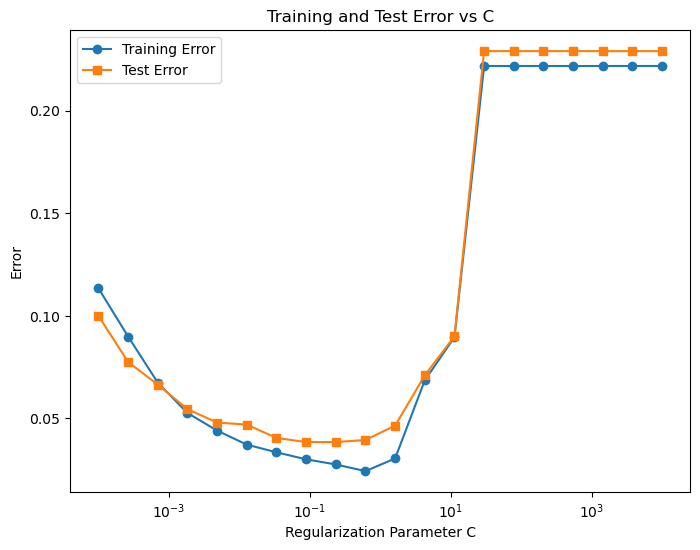

In [19]:
# Define finer set of C values for final plot
C_values_fine = np.logspace(-4, 4, 20)  # 20 values between 10^-4 and 10^4
train_errors = []
test_errors = []

# Initialize variables to track the best errors and corresponding C values
best_train_error = np.inf
best_test_error = np.inf
best_train_C = None
best_test_C = None

# Compute training and test error for each C value
for C in C_values_fine:
    model = SVC(kernel='linear', C=C, max_iter=5000, random_state=15)
    model.fit(train_images, train_labels)
    
    # Compute training error
    train_predictions = model.predict(train_images)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_error = 1 - train_accuracy
    train_errors.append(train_error)
    
    # Compute test error
    test_predictions = model.predict(test_images)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)
    
    # Track the best training error and corresponding C
    if train_error < best_train_error:
        best_train_error = train_error
        best_train_C = C
    
    # Track the best test error and corresponding C
    if test_error < best_test_error:
        best_test_error = test_error
        best_test_C = C
    
    # Print progress
    print(f"C: {C:.4f}, Training Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Output the best errors and corresponding C values
print("\nLowest Training Error: {:.4f} at C = {:.4f}".format(best_train_error, best_train_C))
print("Lowest Test Error: {:.4f} at C = {:.4f}".format(best_test_error, best_test_C))

# Plot training and test error vs C
plt.figure(figsize=(8, 6))
plt.semilogx(C_values_fine, train_errors, label='Training Error', marker='o')
plt.semilogx(C_values_fine, test_errors, label='Test Error', marker='s')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Error')
plt.title('Training and Test Error vs C')
plt.legend()
plt.show()